In [20]:
import os
import pandas as pd
target_path = "D:/python/ml/kaggle"
df = pd.read_csv(os.path.join(target_path, "synthetic_coffee_health_10000.csv"))
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Датасет из первой работы. Методы обработки такие же.

In [21]:
df = df.drop('ID', axis=1)
df = df.query('Gender != "Other"').copy()
df = df.drop('Sleep_Quality', axis=1)

Введем новый атрибут кофеиновой зависимости на основе стресса, потребляемого кофе и качества сна
(при желании можно еще разбить на возрастные группы, общего здоровья и тд)

In [22]:
def calculate_Caffeine_dependency(row):
    total_score = 0

    # Так как кол-во чашек и мг сильно коррелируют, то будем рассмтривать только количество кружек
    total_score += min(row['Coffee_Intake'] * 4, 30) # Максимум при 8+ кружках

    # Короткий сон при высоком потреблении кофе - признак зависимости
    if row['Coffee_Intake'] > 3 and row['Sleep_Hours'] < 6:
        sleep_impact_score = 15
    elif row['Coffee_Intake'] > 2 and row['Sleep_Hours'] < 7:
        sleep_impact_score = 10
    else:
        sleep_impact_score = 0
    total_score += sleep_impact_score

    # Нормальный пульс при высоком потреблении кофе
    if row['Coffee_Intake'] > 3 and row['Heart_Rate'] < 80:
        tolerance_score = 15
    elif row['Coffee_Intake'] > 2 and row['Heart_Rate'] < 85:
        tolerance_score = 10
    else:
        tolerance_score = 0
    total_score += tolerance_score

    # Комбинация стресса и больщого кол-ва кофе
    if row['Stress_Level'] == 'High' and row['Coffee_Intake'] > 3:
        behavior_score = 10
    elif row['Stress_Level'] == 'Medium' and row['Coffee_Intake'] > 2:
        behavior_score = 5
    else:
        behavior_score = 0
    total_score += behavior_score

    return total_score


def categorize_dependency(score):
    if score >= 49: # 70%
        return 'High'
    elif score >= 31: # 45%
        return 'Moderate'
    elif score >= 14: # 20%
        return 'Low'
    else:
        return 'No Dependency'

In [23]:
df['Caffeine_Dependency_Score'] = df.apply(calculate_Caffeine_dependency, axis=1)
df['Caffeine_Dependency_Level'] = df['Caffeine_Dependency_Score'].apply(categorize_dependency)
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Caffeine_Dependency_Score,Caffeine_Dependency_Level
0,40,Male,Germany,3.5,328.1,7.5,24.9,78,Low,14.5,NaN,Other,0,0,29.0,Low
1,33,Male,Germany,1.0,94.1,6.2,20.0,67,Low,11.0,NaN,Service,0,0,4.0,No Dependency
2,42,Male,Brazil,5.3,503.7,5.9,22.7,59,Medium,11.2,Mild,Office,0,0,56.2,High
3,53,Male,Germany,2.6,249.2,7.3,24.7,71,Low,6.6,Mild,Other,0,0,20.4,Low
4,32,Female,Spain,3.1,298.0,5.3,24.1,76,Medium,8.5,Mild,Student,0,1,47.4,Moderate


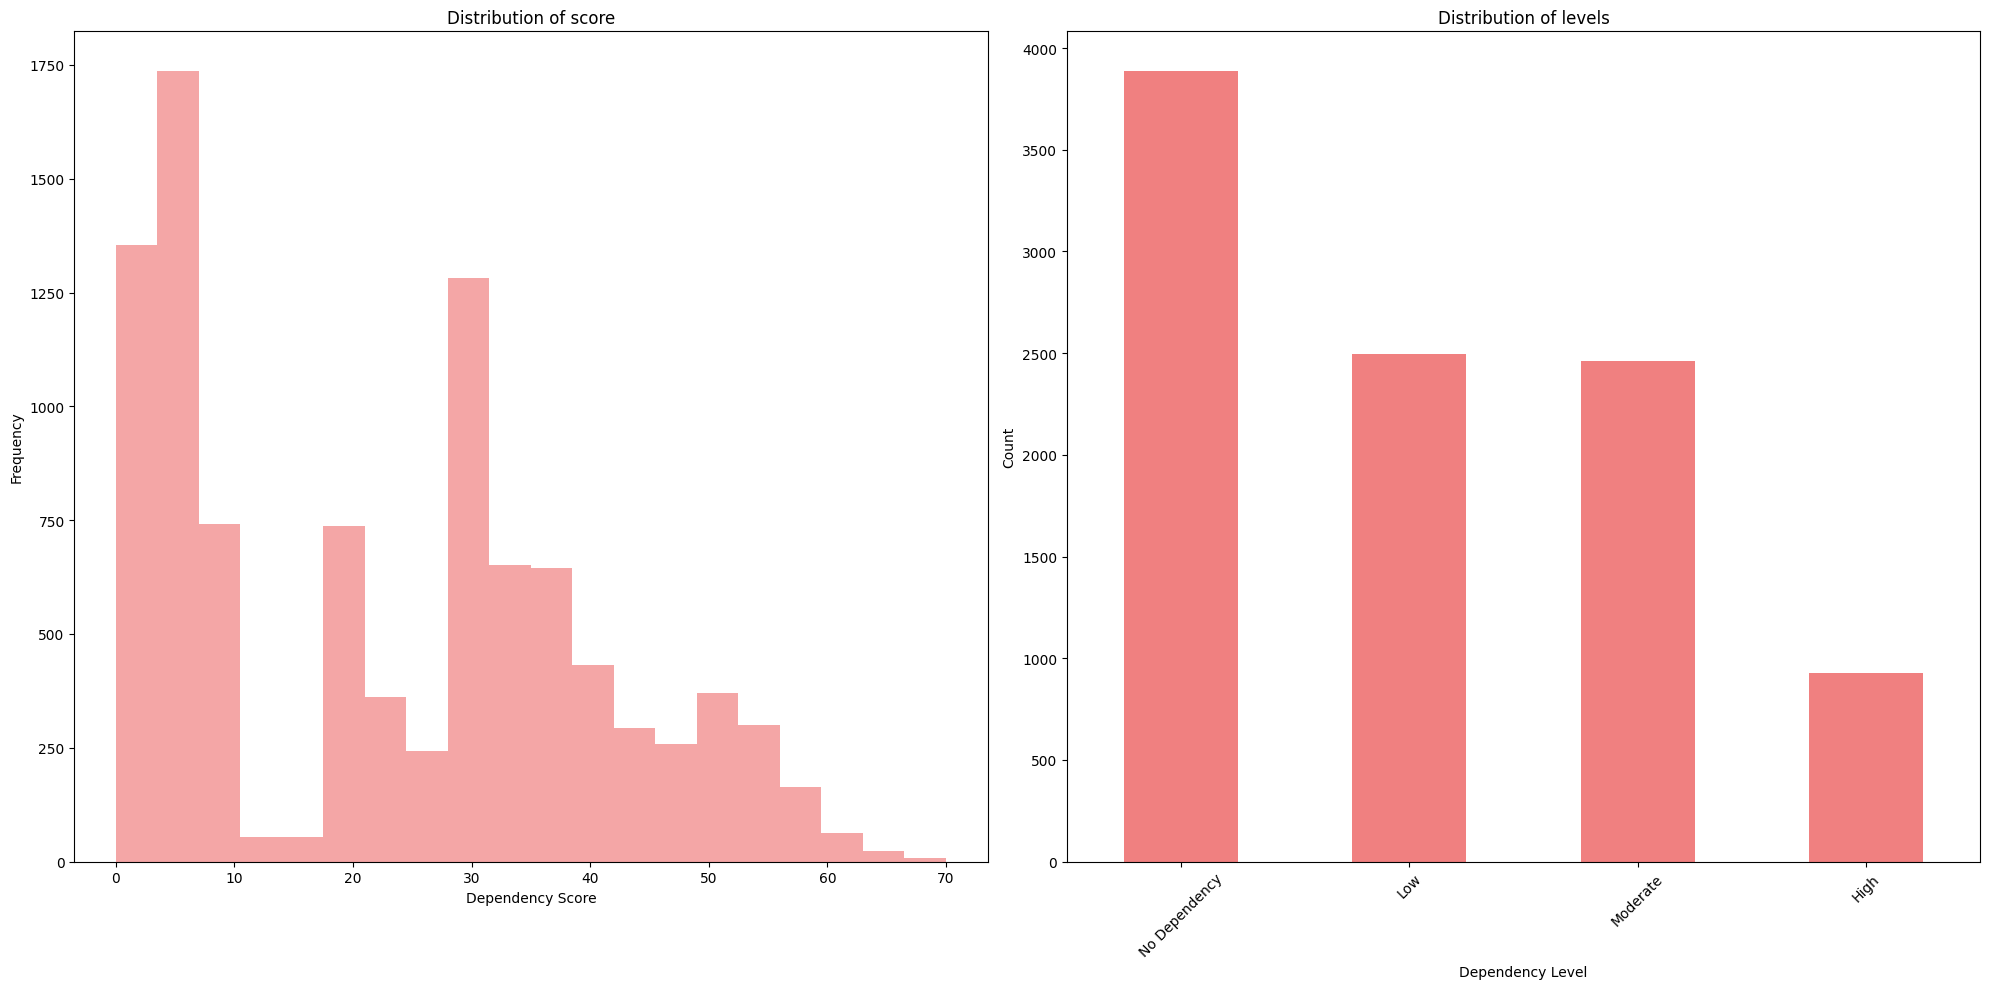

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].hist(df['Caffeine_Dependency_Score'], bins=20, alpha=0.7, color='lightcoral')
axes[0].set_xlabel('Dependency Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of score')

df['Caffeine_Dependency_Level'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_xlabel('Dependency Level')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of levels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

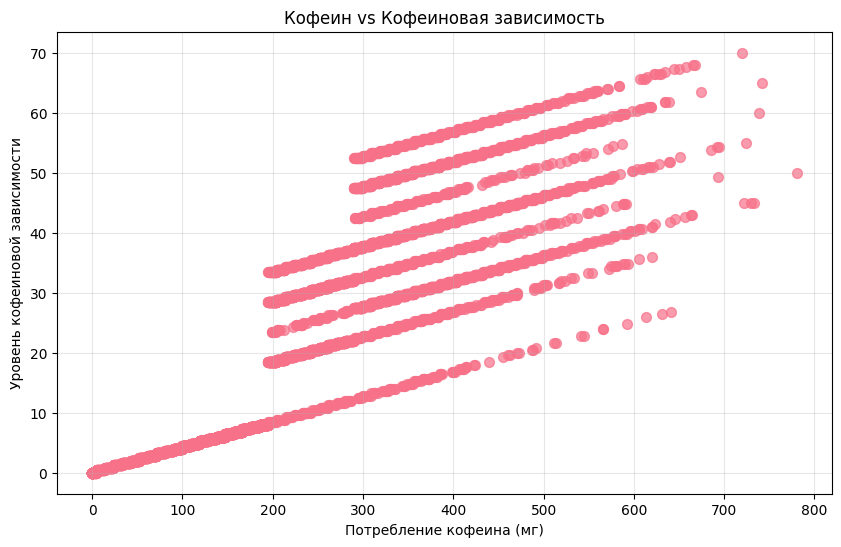

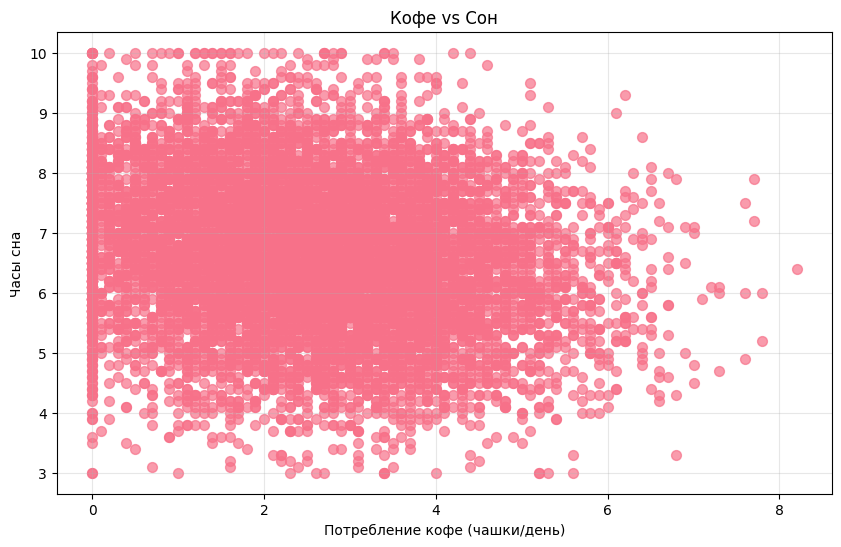

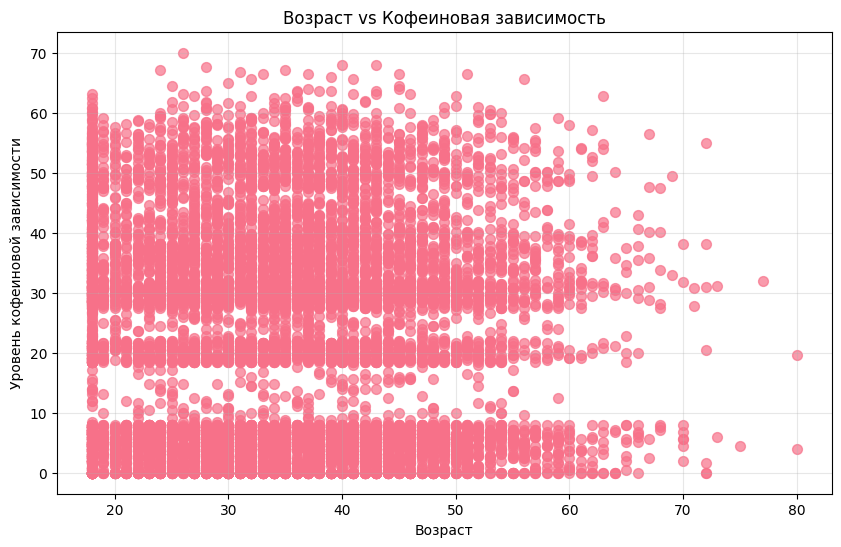

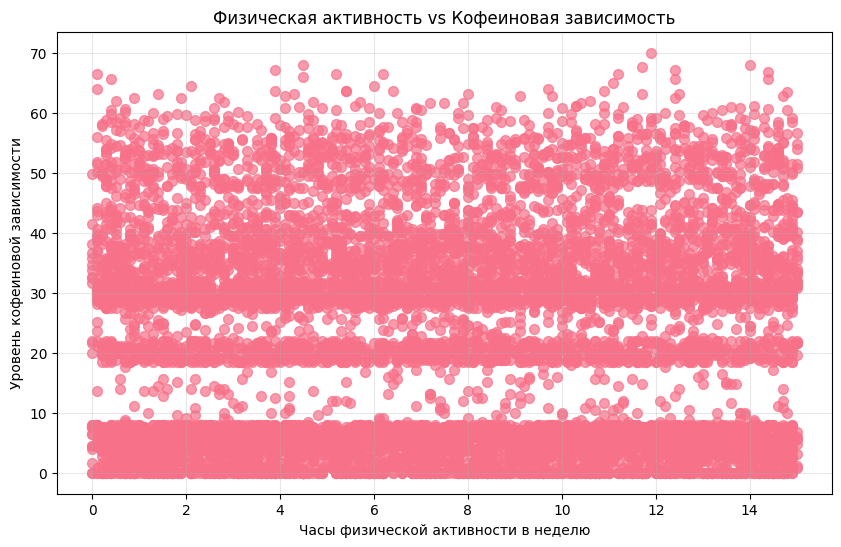

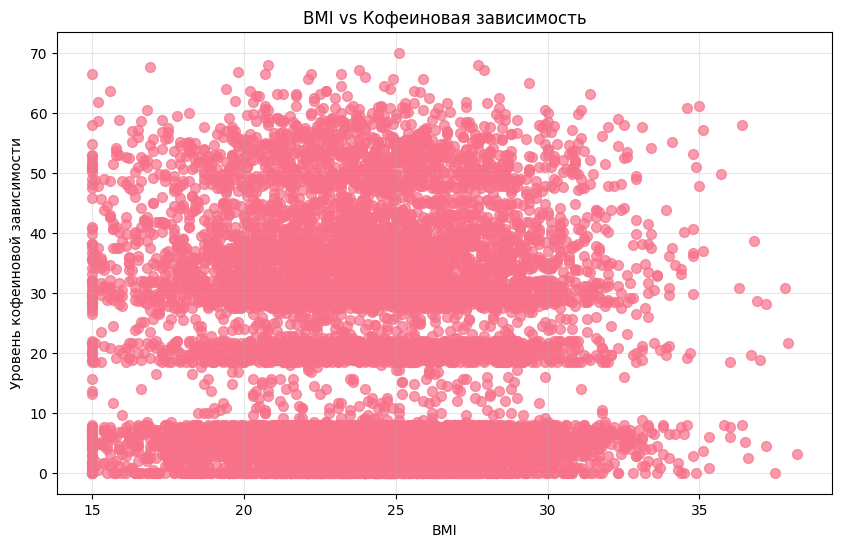

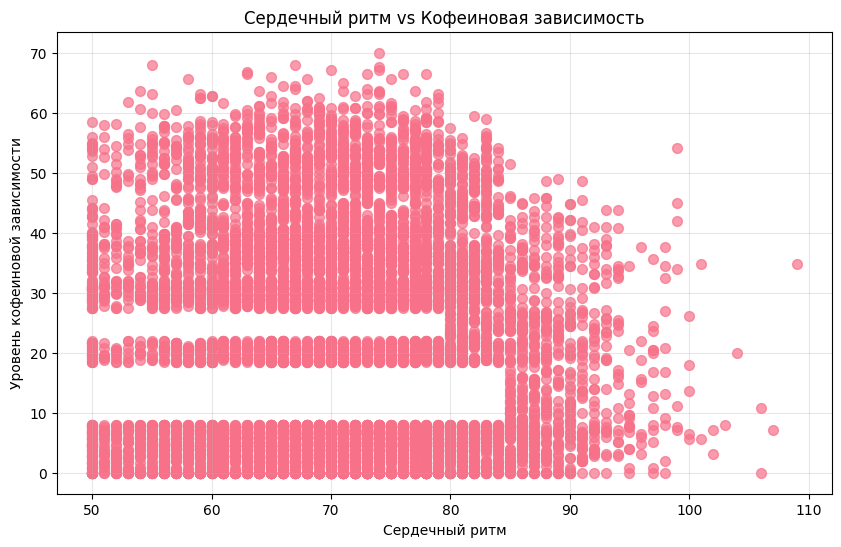

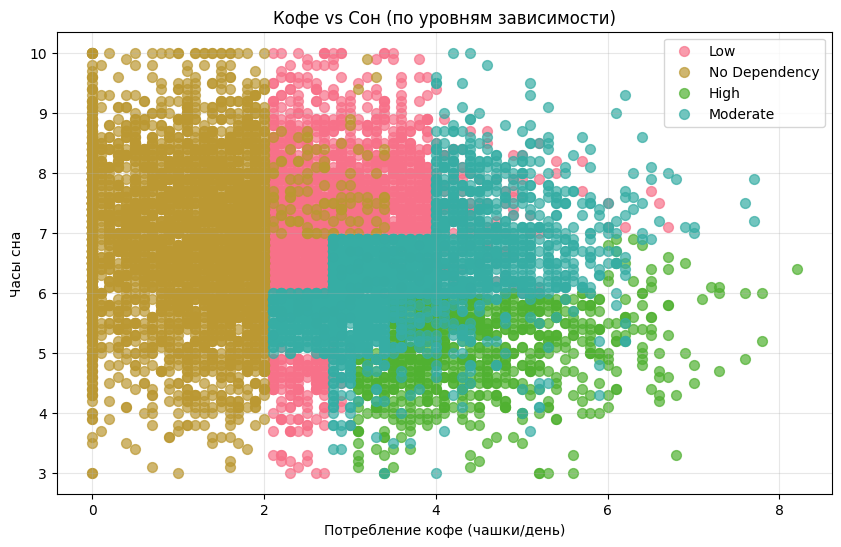

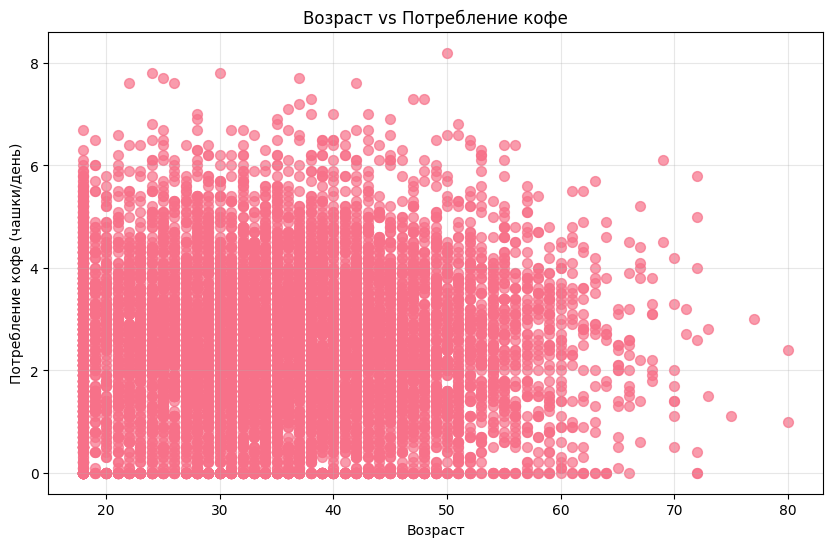

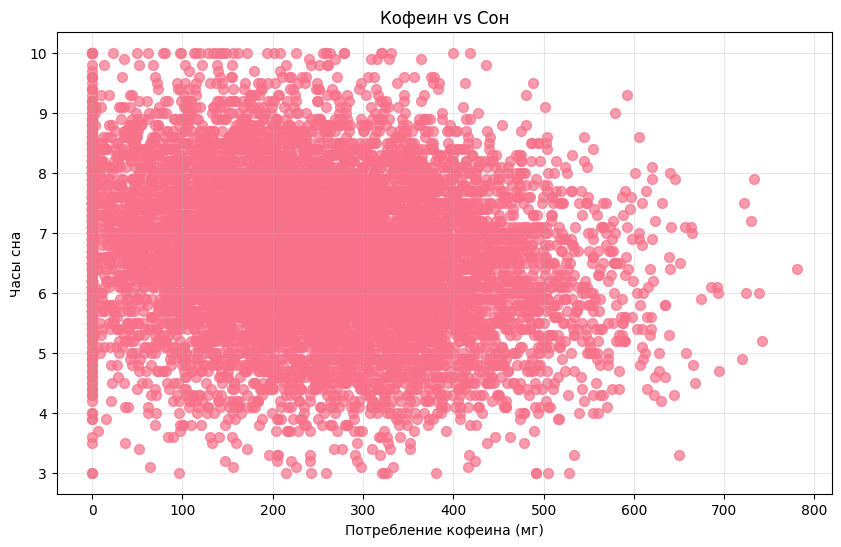

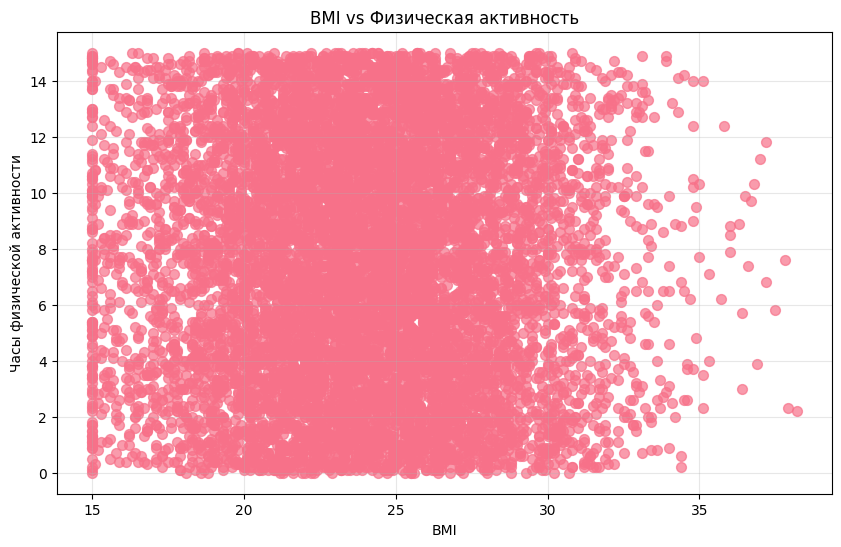

In [25]:
# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

# График 1: Кофеин vs Кофеиновая зависимость
plt.figure(figsize=(10, 6))
plt.scatter(df['Caffeine_mg'], df['Caffeine_Dependency_Score'], alpha=0.7, s=50)
plt.xlabel('Потребление кофеина (мг)')
plt.ylabel('Уровень кофеиновой зависимости')
plt.title('Кофеин vs Кофеиновая зависимость')
plt.grid(True, alpha=0.3)
plt.show()

# График 2: Потребление кофе vs Часы сна
plt.figure(figsize=(10, 6))
plt.scatter(df['Coffee_Intake'], df['Sleep_Hours'], alpha=0.7, s=50)
plt.xlabel('Потребление кофе (чашки/день)')
plt.ylabel('Часы сна')
plt.title('Кофе vs Сон')
plt.grid(True, alpha=0.3)
plt.show()

# График 3: Возраст vs Кофеиновая зависимость
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Caffeine_Dependency_Score'], alpha=0.7, s=50)
plt.xlabel('Возраст')
plt.ylabel('Уровень кофеиновой зависимости')
plt.title('Возраст vs Кофеиновая зависимость')
plt.grid(True, alpha=0.3)
plt.show()

# График 4: Физическая активность vs Кофеиновая зависимость
plt.figure(figsize=(10, 6))
plt.scatter(df['Physical_Activity_Hours'], df['Caffeine_Dependency_Score'], alpha=0.7, s=50)
plt.xlabel('Часы физической активности в неделю')
plt.ylabel('Уровень кофеиновой зависимости')
plt.title('Физическая активность vs Кофеиновая зависимость')
plt.grid(True, alpha=0.3)
plt.show()

# График 5: BMI vs Кофеиновая зависимость
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['Caffeine_Dependency_Score'], alpha=0.7, s=50)
plt.xlabel('BMI')
plt.ylabel('Уровень кофеиновой зависимости')
plt.title('BMI vs Кофеиновая зависимость')
plt.grid(True, alpha=0.3)
plt.show()

# График 6: Сердечный ритм vs Кофеиновая зависимость
plt.figure(figsize=(10, 6))
plt.scatter(df['Heart_Rate'], df['Caffeine_Dependency_Score'], alpha=0.7, s=50)
plt.xlabel('Сердечный ритм')
plt.ylabel('Уровень кофеиновой зависимости')
plt.title('Сердечный ритм vs Кофеиновая зависимость')
plt.grid(True, alpha=0.3)
plt.show()

# График 7: Кофе vs Сон с уровнями зависимости
plt.figure(figsize=(10, 6))
for level in df['Caffeine_Dependency_Level'].unique():
    subset = df[df['Caffeine_Dependency_Level'] == level]
    plt.scatter(subset['Coffee_Intake'], subset['Sleep_Hours'], label=level, alpha=0.7, s=50)
plt.xlabel('Потребление кофе (чашки/день)')
plt.ylabel('Часы сна')
plt.title('Кофе vs Сон (по уровням зависимости)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# График 8: Возраст vs Потребление кофе
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Coffee_Intake'], alpha=0.7, s=50)
plt.xlabel('Возраст')
plt.ylabel('Потребление кофе (чашки/день)')
plt.title('Возраст vs Потребление кофе')
plt.grid(True, alpha=0.3)
plt.show()

# График 9: Кофеин vs Сон
plt.figure(figsize=(10, 6))
plt.scatter(df['Caffeine_mg'], df['Sleep_Hours'], alpha=0.7, s=50)
plt.xlabel('Потребление кофеина (мг)')
plt.ylabel('Часы сна')
plt.title('Кофеин vs Сон')
plt.grid(True, alpha=0.3)
plt.show()

# График 10: BMI vs Физическая активность
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['Physical_Activity_Hours'], alpha=0.7, s=50)
plt.xlabel('BMI')
plt.ylabel('Часы физической активности')
plt.title('BMI vs Физическая активность')
plt.grid(True, alpha=0.3)
plt.show()

Как видим, тут кластеризацию никак не применить.

In [26]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("parisrohan/credit-score-classification")
print("Path to dataset files:", path)
print("Files in directory:")
for file in os.listdir(path):
    print(f"  {file}")

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\parisrohan\credit-score-classification\versions\1
Files in directory:
  test.csv
  train.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_21676\164575353.py:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [28]:
print("Размер датасета:", df.shape)
print("\nИнформация о столбцах и типах данных:")
print(df.info())
print("\nПервые 5 строк:")
df.head()

Размер датасета: (100000, 28)

Информация о столбцах и типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [29]:
! pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Age'] = df['Age'].apply(lambda x: x if x > 0 and x < 120 else np.nan)
df['Age'].fillna(df['Age'].median(), inplace=True)

columns_to_drop = ['ID', 'Customer_ID', 'SSN', 'Name']
df = df.drop(columns=columns_to_drop, errors='ignore')

month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['Month'] = df['Month'].map(month_map)

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    if col != 'Credit_Score':  # Целевую переменную пока не трогаем
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

features_for_clustering = df.select_dtypes(include=[np.number]).columns
features_for_clustering = [col for col in features_for_clustering if col != 'Credit_Score']

print("Признаки для кластеризации:", len(features_for_clustering))
print(features_for_clustering)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21676\599761620.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21676\599761620.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Признаки для кластеризации: 23
['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']


In [ ]:

df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,6011,1824.843333,3,4,3,244,128,...,3,12062,26.822620,180,1,49.574949,81513,3,42380,Good
1,2,23.0,12,6011,3093.745000,3,4,3,244,128,...,1,12062,31.944960,404,1,49.574949,7661,4,31503,Good
2,3,33.0,12,6011,3093.745000,3,4,3,244,128,...,1,12062,28.609352,184,1,49.574949,82226,5,48639,Good
3,4,23.0,12,6011,3093.745000,3,4,3,244,128,...,1,12062,31.377862,185,1,49.574949,30358,6,11593,Good
4,5,23.0,12,6011,1824.843333,3,4,3,244,128,...,1,12062,24.797347,186,1,49.574949,55363,2,51834,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,11484,3359.415833,4,6,7,174,683,...,3,10142,34.663572,307,1,35.104023,69764,1,76392,Poor
99996,5,25.0,9,11484,3359.415833,4,6,7,174,683,...,3,10142,40.565631,308,1,35.104023,65282,2,78093,Poor
99997,6,25.0,9,11484,3359.415833,4,6,5729,174,683,...,1,10142,41.255522,309,1,35.104023,37143,1,79793,Poor
99998,7,25.0,9,11484,3359.415833,4,6,7,174,683,...,1,10142,33.638208,310,1,35.104023,39061,4,44642,Standard


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


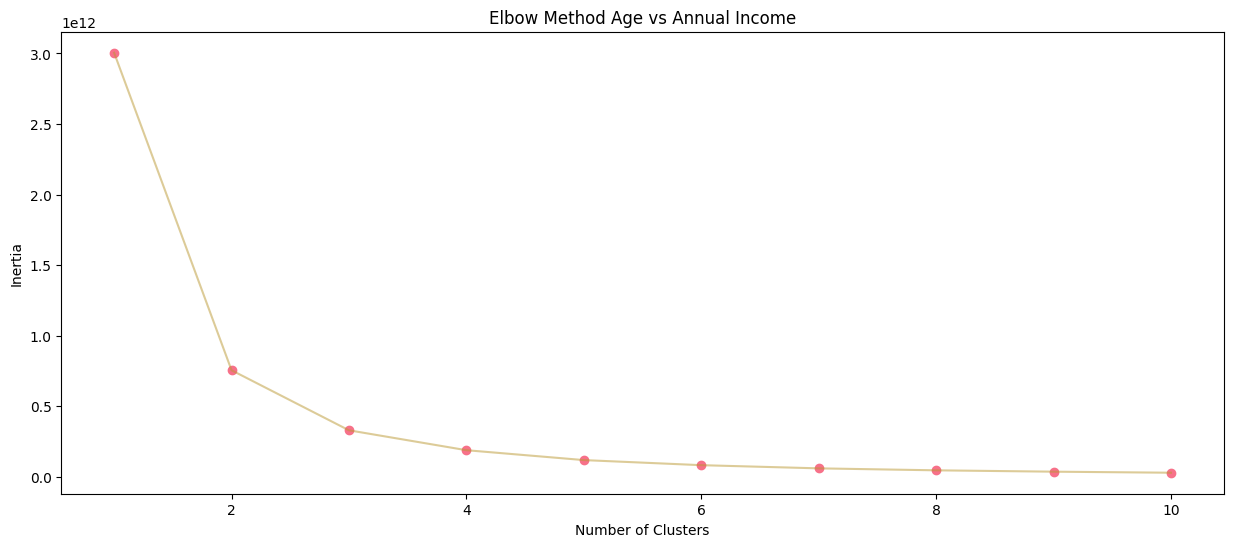

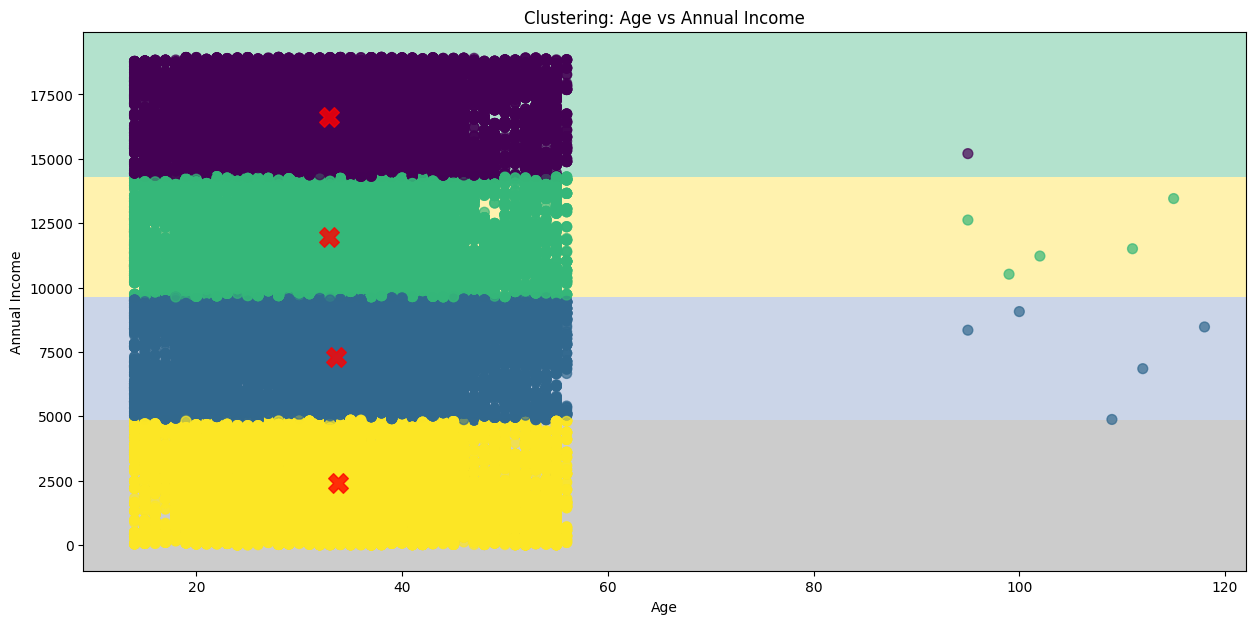

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Кластеризация по Age и Annual_Income
X1 = df[['Age', 'Annual_Income']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state=111, algorithm='elkan'))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method Age vs Annual Income')
plt.show()

algorithm = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 1.0  
x_min, x_max = X1[:, 0].min() - 5, X1[:, 0].max() + 5
y_min, y_max = X1[:, 1].min() - 1000, X1[:, 1].max() + 1000

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

plt.scatter(x=df['Age'], y=df['Annual_Income'], c=labels1, s=50, alpha=0.7)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=200, c='red', alpha=0.8, marker='X')
plt.ylabel('Annual Income')
plt.xlabel('Age')
plt.title('Clustering: Age vs Annual Income')
plt.show()

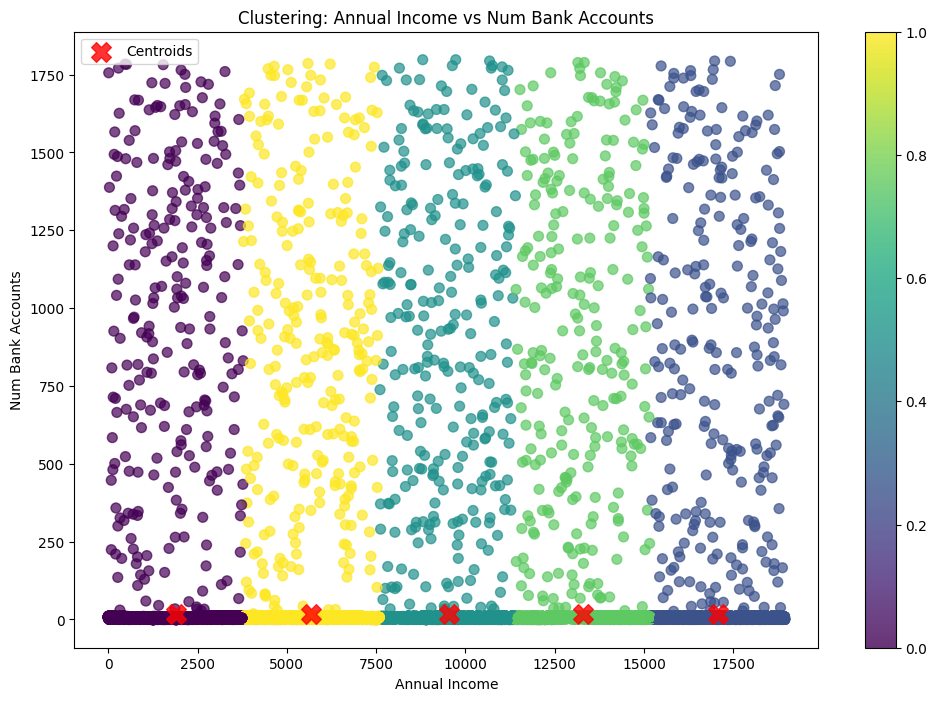

In [33]:
# 2. Кластеризация по Annual_Income и Num_Bank_Accounts
X2 = df[['Annual_Income', 'Num_Bank_Accounts']].iloc[:, :].values

algorithm = (KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(df['Annual_Income'], df['Num_Bank_Accounts'], c=labels2, s=50, alpha=0.7, cmap='viridis')
plt.scatter(centroids2[:, 0], centroids2[:, 1], s=200, c='red', alpha=0.8, marker='X', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Num Bank Accounts')
plt.title('Clustering: Annual Income vs Num Bank Accounts')
plt.colorbar()
plt.legend()
plt.show()

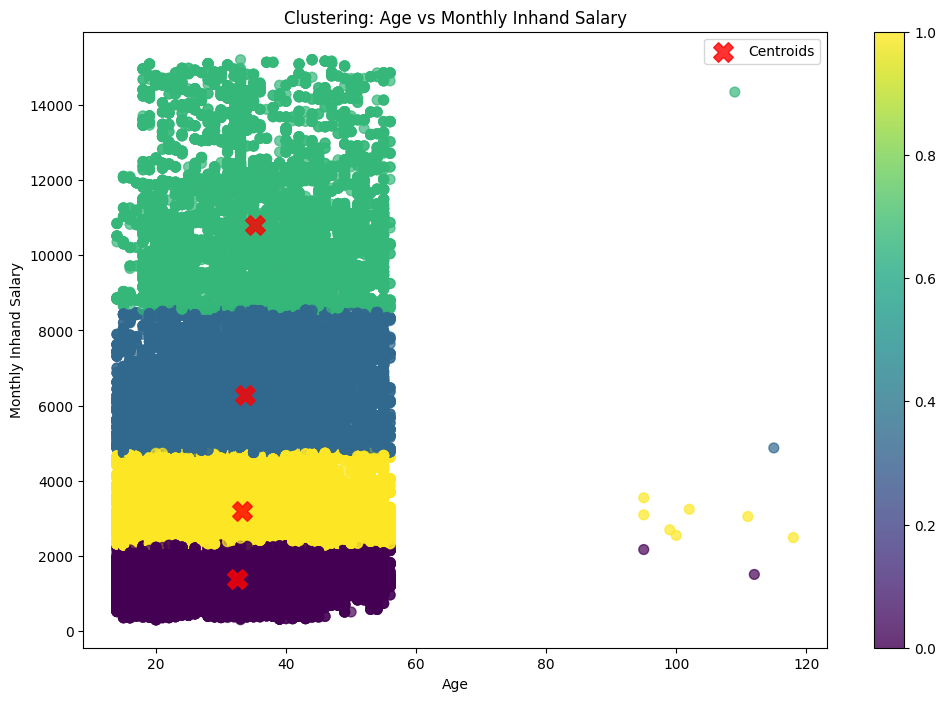

In [34]:
# 3. Кластеризация по Age и Monthly_Inhand_Salary
X3 = df[['Age', 'Monthly_Inhand_Salary']].iloc[:, :].values

algorithm = (KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(df['Age'], df['Monthly_Inhand_Salary'], c=labels3, s=50, alpha=0.7, cmap='viridis')
plt.scatter(centroids3[:, 0], centroids3[:, 1], s=200, c='red', alpha=0.8, marker='X', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Monthly Inhand Salary')
plt.title('Clustering: Age vs Monthly Inhand Salary')
plt.colorbar()
plt.legend()
plt.show()

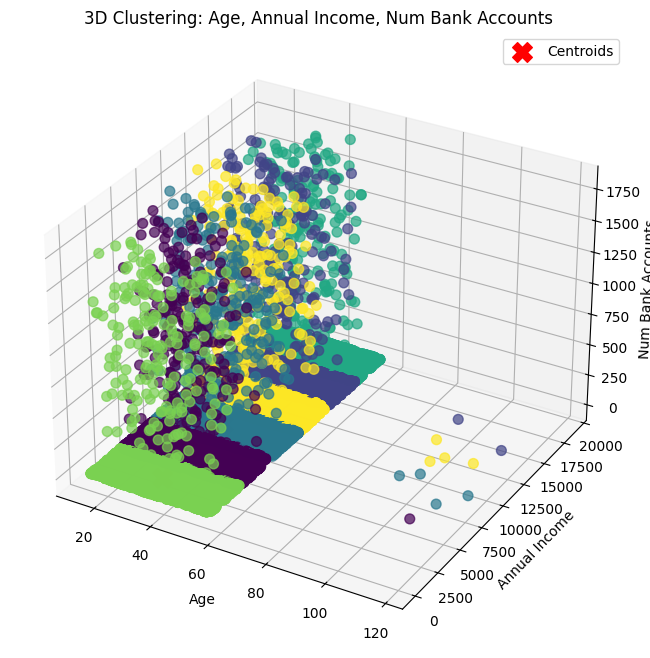

In [35]:
X4 = df[['Age', 'Annual_Income', 'Num_Bank_Accounts']].iloc[:, :].values

algorithm = (KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=111, algorithm='elkan'))
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_

# 3D визуализация
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual_Income'], df['Num_Bank_Accounts'], 
                    c=labels4, s=50, alpha=0.7, cmap='viridis')

ax.scatter(centroids4[:, 0], centroids4[:, 1], centroids4[:, 2],
           s=200, c='red', alpha=1, marker='X', label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Num Bank Accounts')
ax.set_title('3D Clustering: Age, Annual Income, Num Bank Accounts')
plt.legend()
plt.show()